In [ ]:
import torch

seq_lens_kv = torch.ones(64) * 1000
mask = torch.full((4, 4), 0)
mask_cond = torch.arange(mask.size(-1))
mask.masked_fill_(mask_cond < (mask_cond + 1).view(mask.size(-1), 1), 1)
mask

tensor([[1, 1, 0, 0],
        [1, 1, 0, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 1]])

In [17]:
mask.cumsum(-1)

tensor([[1, 2, 2, 2],
        [1, 2, 2, 2],
        [1, 2, 3, 3],
        [1, 2, 3, 4]])

In [8]:
mask.cumsum(-1)

tensor([[1, 1, 1, 1],
        [1, 2, 2, 2],
        [1, 2, 3, 3],
        [1, 2, 3, 4]])

In [5]:
mask.shape

torch.Size([4, 104])

In [13]:
import numpy as np

def idct_64_matrix():
    N = 8
    M = np.zeros((N*N, N*N))
    for i in range(N):
        for j in range(N):
            k = i * N + j
            for u in range(N):
                alpha_u = np.sqrt(1/N) if u == 0 else np.sqrt(2/N)
                cos_i_u = np.cos((2*i + 1) * u * np.pi / 16)
                for v in range(N):
                    l = u * N + v
                    alpha_v = np.sqrt(1/N) if v == 0 else np.sqrt(2/N)
                    cos_j_v = np.cos((2*j + 1) * v * np.pi / 16)
                    M[k, l] = alpha_u * alpha_v * cos_i_u * cos_j_v
    return M

In [14]:
M = idct_64_matrix()

In [10]:
M[-4:,-4:]

array([[-0.03448742,  0.04055292,  0.01866446, -0.04783543],
       [ 0.03448742,  0.00951506, -0.04505999,  0.04055292],
       [ 0.03448742, -0.04783543,  0.04505999, -0.02709659],
       [-0.03448742,  0.02709659, -0.01866446,  0.00951506]])

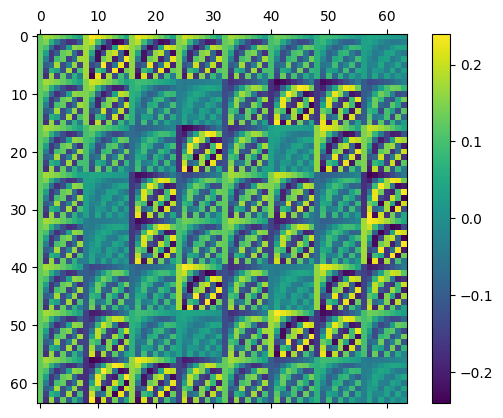

In [15]:
import matplotlib.pyplot as plt
figure = plt.figure()
axes = figure.add_subplot(111)

# using the matshow() function 
caxes = axes.matshow(M, interpolation ='nearest')
figure.colorbar(caxes)

In [1]:
from PIL import Image

# open JPEG
img = Image.open("/Users/haohan/Library/CloudStorage/Dropbox/macscript/local/bin/deep-learning/Paligemma/images.jpeg")

# get quantization tables
qtables = img.quantization

# print them
for table_id, table in qtables.items():
    print(f"Quantization Table {table_id}:")
    for i in range(0, 64, 8):
        print(table[i:i+8])
    print()

Quantization Table 0:
[9, 6, 18, 21, 24, 22, 26, 23]
[7, 19, 19, 23, 24, 26, 24, 26]
[19, 18, 21, 25, 26, 26, 29, 24]
[17, 22, 24, 25, 24, 37, 33, 29]
[22, 23, 32, 26, 26, 49, 46, 31]
[25, 27, 29, 30, 34, 46, 51, 40]
[32, 29, 32, 37, 46, 56, 55, 45]
[32, 42, 41, 43, 51, 44, 46, 43]

Quantization Table 1:
[10, 10, 14, 26, 45, 50, 45, 45]
[10, 13, 16, 37, 45, 45, 47, 45]
[14, 16, 32, 47, 47, 45, 45, 45]
[27, 37, 50, 47, 53, 45, 47, 47]
[50, 45, 45, 45, 45, 45, 45, 45]
[45, 45, 50, 45, 47, 45, 45, 45]
[47, 45, 47, 47, 45, 45, 45, 45]
[45, 53, 47, 45, 45, 45, 45, 45]



In [11]:
import numpy as np

means = np.zeros(64)
stds = np.array(qtables[0])
# stds = np.ones(64) 
samples = np.random.normal(loc=means, scale=stds)
print(samples)

[  -0.29499336    0.25622622   -9.72036685   -9.87499046   48.19331363
    9.02324038   -6.54744057   34.4650277    -7.36403696    6.36130524
   16.12424732   -3.39569902   92.26541735  -46.51199892   14.04850994
   14.32214185   12.87892909    7.58893078   10.95263202  -44.88101446
  -37.52568593  -24.56637671    8.00234385    3.68313854   -3.11805513
  -24.21567732   27.94842361  -15.83314146    7.52671962    5.77322949
   11.99269925   39.39946736  -19.47217368  -11.10516784   44.61699069
  -46.40025607   20.97454888   24.36624239  -37.95768898    6.93873447
    9.08007335   21.22899964   26.10779904  -39.99375108   10.85392836
   31.59990292  112.96263091  -66.45586589  -17.91498041  -22.45675082
  -15.78558149   22.64897314   -0.44870872  -77.22422896  116.03242767
  -24.26632135  -10.12523935  -50.50183476  -41.93461614  -59.75832106
  -56.87791437 -100.19535405   25.16246043   47.94213037]


In [16]:
M @ np.array(samples)

/var/folders/78/vmscn0252f30hkbwyc9zv4gw0000gn/T/ipykernel_7915/2568975723.py:1: RuntimeWarning: divide by zero encountered in matmul
  M @ np.array(samples)
/var/folders/78/vmscn0252f30hkbwyc9zv4gw0000gn/T/ipykernel_7915/2568975723.py:1: RuntimeWarning: overflow encountered in matmul
  M @ np.array(samples)
/var/folders/78/vmscn0252f30hkbwyc9zv4gw0000gn/T/ipykernel_7915/2568975723.py:1: RuntimeWarning: invalid value encountered in matmul
  M @ np.array(samples)


array([  5.13087356, -26.99778258,  29.83251505, -21.15051137,
        -2.62920015, -35.33046201, -53.37053704,  82.33951472,
        34.21824465,  17.39337134, -45.92240975,  25.06865924,
        64.32735612, -69.17338117,  44.4874641 , -33.28304404,
       -33.49439772, -17.47390318,  20.77682046, -28.37131891,
        51.19418193,  58.98508678, -95.87243309,  22.19421261,
        89.19363496, -37.67359537, -44.58198495,  74.04988869,
       -46.46925961, -35.15109228,   1.70818792,  -2.83530653,
       -54.11773931,  -5.07234876, -10.40206237, -29.10296423,
        60.12823607, -67.34526376,  53.17900491,   0.69510205,
        38.45470608, -42.18951655, -10.60575362,  -7.85120501,
         7.39149302,  40.39222633, -12.15367637, -13.77631435,
       -15.85489655,   4.49412618,  60.15334892,  20.45755338,
       -31.82469967,   7.79911089,  22.82634986,  -6.05864063,
       -26.53379618,  25.75656211,   5.88161306,   1.67720352,
        -8.6113312 ,  -8.87296303,  30.57015001, -22.96

In [17]:
from PIL import Image
import numpy as np

BASE_QTABLE_LUMA = np.array([
    16,11,10,16,24,40,51,61,
    12,12,14,19,26,58,60,55,
    14,13,16,24,40,57,69,56,
    14,17,22,29,51,87,80,62,
    18,22,37,56,68,109,103,77,
    24,35,55,64,81,104,113,92,
    49,64,78,87,103,121,120,101,
    72,92,95,98,112,100,103,99,
])

def estimate_qf(filename):
    img = Image.open(filename)
    qtables = img.quantization
    qtable_luma = np.array(qtables[0])  # table 0 = luminance

    best_qf = None
    best_err = float("inf")

    for qf in range(1, 101):  # JPEG quality usually 1..100
        if qf < 50:
            scale = 5000 / qf
        else:
            scale = 200 - 2*qf
        scaled = np.floor((BASE_QTABLE_LUMA * scale + 50) / 100)
        scaled = np.clip(scaled, 1, 255)

        err = np.sum(np.abs(scaled - qtable_luma))
        if err < best_err:
            best_err = err
            best_qf = qf

    return best_qf

print("Estimated QF:", estimate_qf("example.jpg"))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/haohan/Library/CloudStorage/Dropbox/macscript/local/bin/deep-learning/Paligemma/example.jpg'